# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [References](#references)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

>**Tip**: Though it's not a mandate, students can attempt the classroom quizzes to ensure statistical numeric values are calculated correctly in many cases.

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [49]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>





In [50]:
data = pd.read_csv('ab_data.csv')
data.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [51]:
data.shape[0]

294478

**c.** The number of unique users in the dataset.

In [52]:
data.user_id.nunique()

290584

**d.** The proportion of users converted.

In [53]:
data[data['converted'] == 1].user_id.count()/data.shape[0] 

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [54]:
data[(data['group'] == 'treatment') & (data['landing_page'] != 'new_page')].user_id.count() 

1965

**f.** Do any of the rows have missing values?

In [55]:
data.isnull().sum().sum()

0

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  




In [56]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df1 = data[(data['group'] == 'treatment') & (data['landing_page'] == 'new_page')]
df2 = data[(data['group'] == 'control') & (data['landing_page'] == 'old_page')]
df2 = df2.append(df1)
print(df2.user_id.count())
print(df1.user_id.count())

290585
145311


In [57]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  


**a.** How many unique **user_id**s are in **df2**?

In [58]:
df2.user_id.nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [59]:
df2.user_id.duplicated().sum()

1

**c.** Display the rows for the duplicate **user_id**? 

In [60]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [61]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2.drop_duplicates(subset=['user_id'], inplace =True)
# Check again if the row with a duplicate user_id is deleted or not
df2.user_id.duplicated().sum()

0

> Becuase **converted** column have only 0's & 1's.
 So I can use mean to calculate probabilities.

### ToDo 1.4  

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

> Because  converted column only have binary values 0's & 1's, we can use mean to find probability

In [62]:
df2['converted'].mean()

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [63]:
cont_conv = df2[df2['group'] == 'control'].converted.mean()
cont_conv

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [64]:
treat_conv = df2[df2['group'] == 'treatment'].converted.mean()
treat_conv

0.11880806551510564

In [65]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups
obs_diff = cont_conv - treat_conv
obs_diff

0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [66]:
df2[df2['landing_page'] == "new_page"].user_id.count()/df2.shape[0] 

0.50006194422266881

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

> **Answer** :<br>
>**According to some of the statistics above, we found that the conversion rate of the old page is higher at a very small rate, which is 0.0015, as the conversion rate for the old page is 0.12039, while the conversion rate for the new page is 0.1188, and this is not enough evidence to say that the new page is better and the congestion rate is more than We also do not know if there are other factors such as resistance to change and the time period for which samples were taken, So we need another application such as hypothesising test or P-value.**




<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  



### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

>**Put your answer here.**

>**$H_0$** : **$p_{old}$** >=  **$p_{new}$**

>**$H_1$** : **$p_{old}$** <  **$p_{new}$**

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>




**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [67]:
# Based on the hypothesis stated we imagine the conversion rate
# of an old and new page are equal.
conversion_rate_new = df2.converted.mean() 
conversion_rate_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [68]:
# According 𝑝𝑛𝑒𝑤  =  𝑝𝑜𝑙𝑑  =  𝑝𝑝𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛
conversion_rate_old = conversion_rate_new
conversion_rate_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>


In [69]:
num_new = df2[df2["group"] == 'treatment'].user_id.count()
num_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [70]:
num_old = df2[df2["group"] == 'control'].user_id.count()
num_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [71]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([0,1], size=num_new, p=[conversion_rate_new, (1-conversion_rate_new)])
new_page_converted

array([1, 1, 1, ..., 1, 0, 1])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [72]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([0,1], size=num_old, p=[conversion_rate_old, (1-conversion_rate_old)])
old_page_converted

array([1, 1, 1, ..., 0, 1, 0])

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [73]:
p_diff = new_page_converted.mean() - old_page_converted.mean()
p_diff

0.00081442820651322911


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [74]:
# Sampling distribution 
p_diffs = []
for _ in range(10000):
    new_converted_simulation = np.random.choice([0,1], size=num_new, p=[conversion_rate_new, (1-conversion_rate_new)])
    old_converted_simulation = np.random.choice([0,1], size=num_old, p=[conversion_rate_old, (1-conversion_rate_old)])
    diff = new_converted_simulation.mean() - old_converted_simulation.mean() 
    p_diffs.append(diff)

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>
 


In [75]:
# Calculate the actucl difference observed in ab_data
obs_old_mean = df2[df2['group']=="control"].converted.mean()
obs_new_mean = df2[df2['group']=="treatment"].converted.mean()
obs_diff = obs_new_mean - obs_old_mean
print(obs_diff)

-0.00157823898536


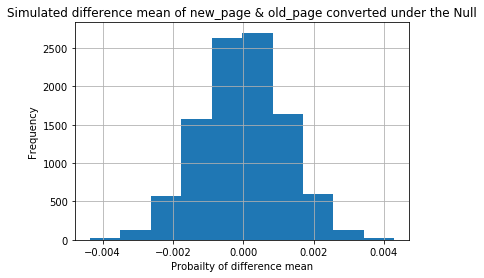

In [76]:
# plot sampling distribution
plt.hist(p_diffs)
plt.xlabel('Probailty of difference mean')
plt.ylabel('Frequency')
plt.title('Simulated difference mean of new_page & old_page converted under the Null')
plt.grid(True)
plt.show()

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [77]:
# Convert p_diffs to array
p_diffs = np.array(p_diffs)

# Calculate the propotion of the p_diffs are greater than the actual difference observed in ab_data.csv
(p_diffs > obs_diff).mean()

0.90239999999999998

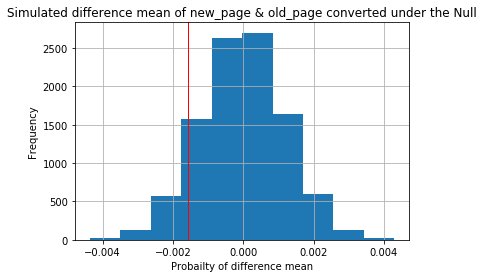

In [78]:
# plot sampling distribution
plt.hist(p_diffs)
plt.xlabel('Probailty of difference mean')
plt.ylabel('Frequency')
plt.title('Simulated difference mean of new_page & old_page converted under the Null')

# Draw line to mark the actual difference observed
plt.axvline(obs_diff,c='r',linewidth = 1);
plt.grid(True)
plt.show()


**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

**Answers** :

>**In scientific, this value is called p-value is the proportion of the probability of differences between conversion rates of control and treatment groups than the difference observed**


>**p-value is 90.32% so the proportion of the probability of differences that is greater than the difference observed and to reject the null hypothesis, the p-value should be below our α level of 0.05 (agreed level of 5% chance of committing a Type I error if the null is true). so that we cannot reject the null hypothesis because the p-value is large enough so that the null hypothesis is true, therefore we keep the old page because we don't have enough evidence that the new_page has a better conversion rate than the old_page.**



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [79]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2[(df2['group'] == "control") & (df2['converted'] == 1)]['converted'].count()

# number of conversions with the new_page
convert_new =df2[(df2['group'] == "treatment") & (df2['converted'] == 1)]['converted'].count()

# number of individuals who were shown the old_page
n_old = df2[df2['group'] == "control"]['converted'].count()

# number of individuals who received new_page
n_new = df2[df2['group'] == "treatment"]['converted'].count()

print("Number of conversions with the old_page :" ,convert_old )
print("Number of conversions with the new_page :" ,convert_new )
print("Number of individuals who were shown the old_page :" ,n_old )
print("Number of individuals who received new_page :" ,convert_old )

Number of conversions with the old_page : 17489
Number of conversions with the new_page : 17264
Number of individuals who were shown the old_page : 145274
Number of individuals who received new_page : 17489


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 


The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. 
>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 


In other words, we determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. A "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.



---



In [80]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score, p_value)

1.31092419842 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>


> **Answer** : <br>
**The z-score and the p_value mean Null hypothesis is true and we can't reject it, The Null hypothesis say the converted rate of the old_page is the same or greater than the converted rate of the new_page and we don't have enough evidence that the new_page has a better conversion rate than the old_page. The p_value is 0.91 and is higher than the 0.05 significance level. That means we can't be confident with a 95% confidence level that the converted rate of the new_page is larger than the old_page and z_score is 1.3109 less than 1.6448, therefore, we would fail to reject the Null hypothesis.**

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer**

>Because the converted variable contains only two values 0's and 1's so we need to classify them into binary groups, Therefore we will Implement **logistic regression model**.

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [81]:
df2[['control','treatment']]= pd.get_dummies(df2['group'])
df2 = df2.drop('control',axis = 1)
df3 = df2.rename(columns={'treatment': 'ab_page'}, inplace = True)
df2['intercept'] = 1
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,0,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,0,1


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [82]:
import statsmodels.api as sm

logit = sm.Logit(df2['converted'],df2[['intercept','ab_page']])

**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [83]:
model = logit.fit()
model.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-11-02 21:12 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  


**Answer**

>**P-value associated with ab_page estimate 18.88%... Of course, it's different from Part II which was 90.32% and the reason is hypothesis is a two-sided test in the logistic regression model which  $H_1$ as $(p_{new} = p_{old})$ while using the one-sided test in Part II which $H_1$ as $(p_{new} > p_{old})$. Despite this difference, they remain still greater than the typical $\alpha$ level of type I error rate of 5%. Therefore, we would fail to reject the null hypothesis.**



**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer**

>**Considering other factors is a good idea but before adding these features, we must check if they are relevant or not but in case they are relevant. of course, it's great and the result will be more accurate without any bias and help us to make the right decisions. In another hand, in case new features are semi or irrelevant. This affects results negatively so may make wrong decisions in addition to the model will more complex.**

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 


 Provide the statistical output as well as a written response to answer this question.

In [84]:
# Read the countries.csv
countries = pd.read_csv("countries.csv")
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [85]:
# Show all countries included in the dataset
countries.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [86]:
# Join with the df2 dataframe
df_merged = df2.merge(countries, on = "user_id", how = "inner")
df_merged.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US
2,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US
3,936923,2017-01-10 15:20:49.083499,control,old_page,0,0,1,US
4,719014,2017-01-17 01:48:29.539573,control,old_page,0,0,1,US


In [87]:
# Display the Number of users in each country in dataset
df_merged.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [88]:
# Create the necessary dummy variables
df_merged[['CA', 'UK', 'US']] = pd.get_dummies(df_merged['country'])
# Show df_merged table
df_merged.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US,0,0,1
2,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US,0,0,1
3,936923,2017-01-10 15:20:49.083499,control,old_page,0,0,1,US,0,0,1
4,719014,2017-01-17 01:48:29.539573,control,old_page,0,0,1,US,0,0,1


**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 
 


In [89]:
# Fit your model, and summarize the results
# we need to always drop one of the columns when fitting our dummy variables to create matrices that are full rank.
logit = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'UK', 'US']])
model = logit.fit()
model.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-11-02 21:12 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""


>**According to the summary results provided, there isn't sufficient evidence that $(p_{new} > p_{old})$ and p-values associated with the variables are higher than the significance level of 0.05 ($\alpha$ level) which there is no strong evidence that the countries (US, CA and UK) influence the conversion rate, so that we cannot reject the null hypothesis.**

>**We can't recommend launching a new page which maybe cost of implementing a new page could be higher than the expected profit from the increase of conversion rate.**

<a id='references'></a>
## References

- Statistics For Dummies (For Dummies (Lifestyle)) 2nd Edition
- https://pandas.pydata.org/


In [91]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0